# Описание

Выполним небольшой проект на проверку усвоенных знаний по исследовательскому анализу данных

Для выполнения проекта используйте набор данных ../files/nba_games.csv

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import pearsonr, chi2_contingency

np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.expand_frame_repr', None)

nba = pd.read_csv('../files/nba_games.csv')


In [6]:
print(nba.head())

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  pts  opp_pts game_result  forecast  point_diff
0  194611010TRH     1947   Knicks       Huskies             A            0   68       66           W  0.359935           2
1  194611020CHS     1947   Knicks         Stags             A            0   47       63           L  0.368899         -16
2  194611020PRO     1947  Celtics  Steamrollers             A            0   53       59           L  0.359935          -6
3  194611050BOS     1947  Celtics         Stags             H            0   55       57           L  0.620204          -2
4  194611070STB     1947   Knicks       Bombers             A            0   68       63           W  0.339290           5


## Описание набора данных
- game_id - Идентификатор игры
- year_id - Идентификатор года, названный на основании года в котором сезон закончился
- fran_id - Идентификатор франшизы. Несколько команд могут находится под одним индентификатором франшизы
- opp_fran - Идентификатор франшизы опонента
- game_location - Home (H), Away (A), neutral (N)
- is_playoffs - флаг был ли плейофф
- pts - очки заработанные командой
- opp_pts - очки заработанные командой противника
- game_result - победа или проигрыш команды указанной в столбце team_id
- forecast - шанс победы команды находящейся в колонке team_id на основании рейтинга elo и значении в колонке game_location
- point_diff - разница между значениями колонок pts и opp_pts

In [8]:
# разделите набор данных на два маллых в одном будет информация за 2010 год во втором 2014
# назовите два новых набора данных nba_2010 и nba_2014 соответственно
nba_2010 = nba[nba.year_id == 2010].reset_index(drop=True)
nba_2014 = nba[nba.year_id == 2014].reset_index(drop=True)

In [9]:
# Поработаем с набором за 2010 год
# Создайте две переменные которые будут содержать series содержащий информацию по pts в разрезе двух франшиз
# Назовите две переменные knicks_pts_10 и nets_pts_10 соответственно
knicks_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Knicks'].reset_index(drop=True)
nets_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Nets'].reset_index(drop=True)

In [10]:
# Рассчитайте разницу средних значений между двумя франшизами и запишите значение в переменную diff_mean_2010
diff_mean_2010 = knicks_pts_10.mean() - nets_pts_10.mean()
print(diff_mean_2010)

9.731707317073173


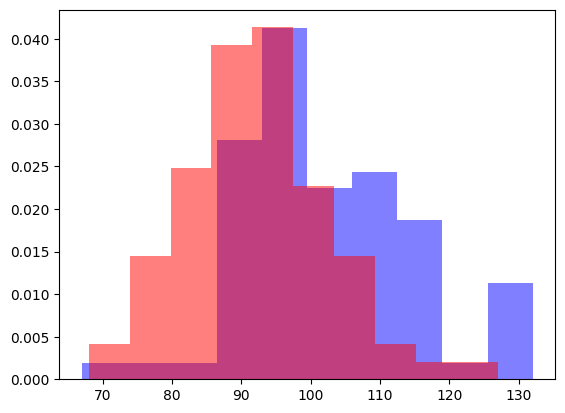

In [11]:
# Отобразите гистограмму перекрытия между двумя командами
plt.hist(knicks_pts_10, color='Blue', label='Knicks', alpha=0.5, density=True)
plt.hist(nets_pts_10, color='Red', label='Nets', alpha=0.5, density=True)
plt.show()
plt.close()

0.44706798131809933


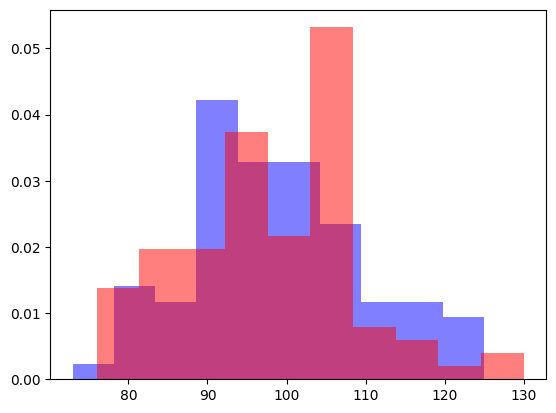

In [12]:
# Теперь приступим к работе с набором за 2014 год
# Проделайте все те же шаги
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks'].reset_index(drop=True)
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets'].reset_index(drop=True)
diff_mean_2014 = knicks_pts_14.mean() - nets_pts_14.mean()
print(diff_mean_2014)
plt.hist(knicks_pts_14, color='Blue', label='Knicks', alpha=0.5, density=True)
plt.hist(nets_pts_14, color='Red', label='Nets', alpha=0.5, density=True)
plt.show()
plt.close()

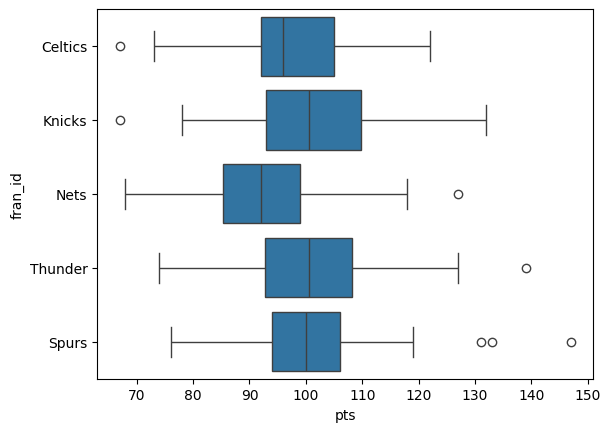

In [13]:
# Вернемся к набору 2010 года
# Сформируйте side-by-side boxplot с данными по y - pts а по x - fran_id
# Есть ли взаимосвязь между кол-вом очков и франшизой ?
sns.boxplot(nba_2010, x='pts', y='fran_id')
plt.show()
plt.close()

Высокой взаимосвязи между данными переменными судя по полученной диаграмме нет так как на графике видно большое кол-во пересечений значений

In [14]:
# Давайте теперь выясним побеждают ли команды больше дома или вне его
# Составьте кроссовую таблицу двух категорийных переменных game_location и game_result
# Сохраните значение в переменной location_result_freq
location_result_freq = pd.crosstab(nba.game_location, nba.game_result)
print(location_result_freq)

game_result       L     W
game_location            
A              7105  5003
H              4298  7942
N                 3     8


In [15]:
# Сконвертируйте полученную таблицу числа в пропорцию и назовите новую переменную location_result_prop
location_result_prop = location_result_freq / len(nba)
print(location_result_prop)

game_result           L         W
game_location                    
A              0.291679  0.205386
H              0.176444  0.326040
N              0.000123  0.000328


In [17]:
# Используя кол-ную кроссовую таблицу сформируйте таблицу ожидаемых значений
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[5669.52 6438.48]
 [5731.33 6508.67]
 [   5.15    5.85]]
1359.2878749575696


Судя по полученному результату можно сказать что существует связь между результатом игры и местом ее проведения

Команды больше выигрывают дома нежели в гостях

In [18]:
# Используя набор данных nba_2010 рассчитайте ковариацию между forecast и point_diff. Назовите данную переменную point_diff_forecast_cov
# отобразите значение на экране
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


In [19]:
# Используя тот же набор данных рассчитайте корреляцию значений. Сохраните значение в переменную point_diff_forecast_corr и выведите ее на экран
point_diff_forecast_corr, p  = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

0.4402088708468082


Судя по полученному значению можно сказать что взаимосвязь между переменными есть достаточная для того чтобы ее учитывать

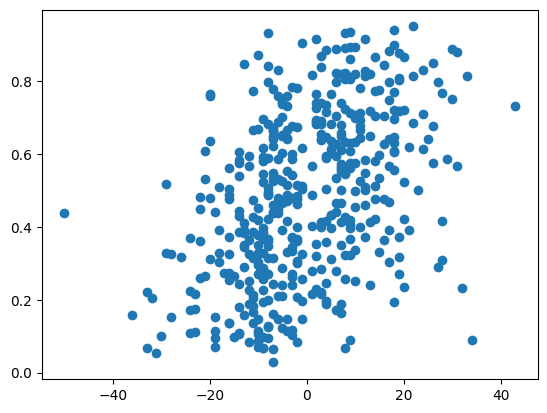

In [21]:
# постройте точечную диаграмму
plt.scatter(x=nba_2010.point_diff, y=nba_2010.forecast)
plt.show()
plt.close()

Судя по графику между переменными есть линейная взаимосвязь средней силы